# **Lab Exercise: Linear and Logistic Regression**

## **Linear Regression Construction** 

#### **Section 1: Setting Up and Importing Libraries**
*Objective:* Load the required `Python libraries`.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### **Section 2: Linear Regression Data Preparation**

*Objective:* Create a dataset for linear regression.

Task: Write the code to:

Create a dataset with features and target variables for linear regression.
Visualize the data using Matplotlib.


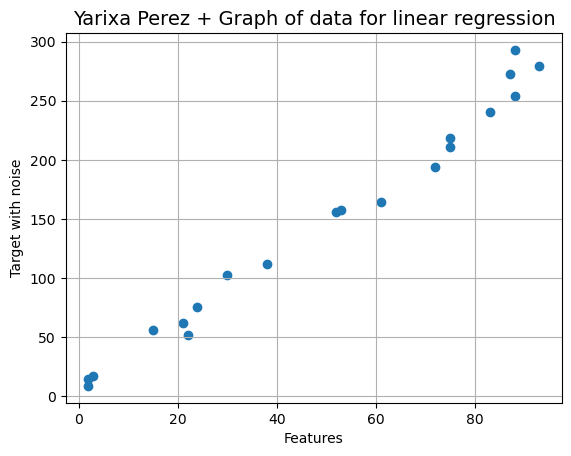

In [6]:
# Generate synthetic data for linear regression
np.random.seed(42)  # For reproducibility
X = np.random.randint(1, 100, 20)  # Features (independent variable)
y = 3 * X + 7 + np.random.normal(0, 15, 20)  # Target with noise

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid

# Your code
plt.scatter(X, y)
plt.xlabel('Features')
plt.ylabel('Target with noise')
plt.title("Yarixa Perez + Graph of data for linear regression", fontsize=14)
plt.grid()
plt.show()

#### **Section 3: Implementing Linear Regression**

*Objective:* Practice linear regression construction.

Task: Write the code to:

Write a Linear Regression function to minimize the cost function and find the optimal parameters.


For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it.

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


In [41]:
# Your code for linear regression model

# Sklearn model
from sklearn import linear_model

# Prepare data
df = pd.read_csv('Study_hour_data.csv')                        # Read data file
new_df = df.drop('Passed', axis='columns')                     # Remove Passed value from dataframe table
hours_df = new_df.drop('Class Participation', axis='columns')  # Remove Class Participation from new dataframe table
part_df = new_df.drop('Hours of Study', axis='columns')        # Remove Hours of Study from new dataframe table

X_train = hours_df    # Assign training data X = Hours of Study, Y = Class Participation
y_train = part_df

# Building the Model
reg = linear_model.LinearRegression()    # Create linear regression object
reg.fit(X_train, y_train)

# Review Model parameter
m = reg.coef_                            # Check coefficient (m) and intercept (b)
b = reg.intercept_
print("Coefficient: ", coef)
print("Intercept", inter)
Y = m * 8 + b                            # Y = m * X + b (m is coefficient and b is intercept)
print("Class Participation: ", Y)
print()

# Predict Class Participation with Hours of Study = 3
res = reg.predict([[3]])
print("Class Participation: ", res)

Coefficient:  [[0.01062536]]
Intercept [0.46210503]
Class Participation:  [[0.54710792]]

Class Participation:  [[0.49398111]]


C:\Users\Yarixa\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [43]:
import numpy as np
import pandas as pd

# Your code for linear regression model

# Manually write cost function & gradient descent

# your code
df = pd.read_csv('Study_hour_data.csv')                        # Read data file
new_df = df.drop('Passed', axis='columns')                     # Remove Passed value from dataframe table
hours_df = new_df.drop('Class Participation', axis='columns')  # Remove Class Participation from new dataframe table
part_df = new_df.drop('Hours of Study', axis='columns')        # Remove Hours of Study from new dataframe table

# Reshape X to include a bias term (column of ones for the intercept) by np.column_stack
theta = np.zeros(2)
X = np.column_stack((np.ones(len(hours_df)), hours_df))
y = df['Class Participation'].values.ravel()

# Define the cost function for linear regression
def compute_cost(X, y, theta):
    """
    Compute the cost function for linear regression.
    """
    # your code
    cost = np.sum(np.square(np.dot(X, theta) - y)) / (2 * len(y))
    
    return cost


# Define the gradient descent function
def gradient_descent(X, y, alpha, iterations):
    """
    Perform gradient descent to minimize the cost function.
    """
    
    theta = np.zeros(2)  # Initialize theta (matching number of features)
    m = len(y)  # Number of training examples

    # Iterate to update theta with iterations
    # your code 
    for i in range(iterations):
        
        # Update theta[0] (intercept term) using the gradient of the cost function
        t0 = theta[0] - (alpha / m) * np.sum(np.dot(X, theta) - y)
        # Update theta[1] (slope term) using the gradient of the cost function
        t1 = theta[0] - (alpha / m) * np.sum((np.dot(X, theta) - y) * X[:,1])

        # Update the data as a new array with the computed values
        theta = np.array([t0, t1])
        
    return theta

theta = np.zeros(X.shape[1])

# Number of iterations for gradient descent
iterations = 5000

# Learning rate for gradient descent
alpha = 0.0001

# Compute initial cost
init_cost = compute_cost(X, y, theta)

# Call the gradient descent function to compute optimized parameters
theta = gradient_descent(X, y, alpha, iterations)

# Compute the cost using the optimized parameters
cost = compute_cost(X, y, theta)

# Print the results
print("Optimized theta (parameters):", theta)  # Optimized values for theta (intercept and slope)
print("Final cost:", cost)  # Final cost value to evaluate the fit

Optimized theta (parameters): [0.09124459 0.09119616]
Final cost: 0.06643666333371076


### **Section 4: Visualizing the Linear Regression Line**

*Objective:* Plot the regression line with the original data.

Task: Plot the data points and the fitted regression line.

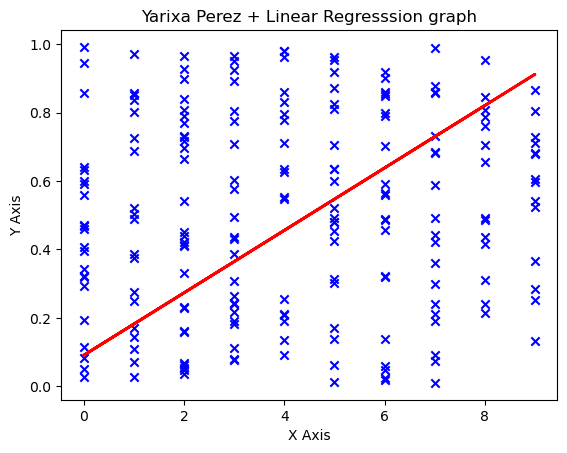

In [53]:
import matplotlib.pyplot as plt

# Compare predictions with actual values
y_pred = np.dot(X, theta)


# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code
plt.scatter(hours_df, part_df, marker='x', color='blue', label='Actual Data')
plt.plot(hours_df, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Yarixa Perez + Linear Regresssion graph')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.show()

## **Logistic Regression Construction** 

#### **Section 1: Logistic Regression Data Preparation**

*Objective:* Prepare data for logistic regression.

Task: Write the code to:

Create synthetic data for binary classification.
Visualize the data.

#### Dataset Description

Study_hour_Data.csv - The dataset simulates a scenario where students' chances of passing a course are influenced by their study habits and class participation. It contains 200 observations and the following three columns:


**Hours of Study:**
Integer values representing the number of hours a student spends studying in a week.
Range: 0 to 9.

**Class Participation:**
Float values between 0 and 1, representing the level of engagement in class activities.
Higher values indicate greater participation.

**Passed:**
Binary target variable indicating whether the student passed the course:
1: Passed.
0: Did not pass.
Determined based on a weighted combination of Hours of Study and Class Participation (with added noise), with a threshold value of 5.

In [59]:
import pandas as pd
#read data from Pandas

# Load dataset
# please use Study_hour_Data.csv as your target data
data = pd.read_csv('Study_hour_data.csv')

# Display basic information
print(data.info())
print(data.describe())

# Generate your training data X & y
X =  data[['Hours of Study']].values
y =  data[['Passed']].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hours of Study       200 non-null    int64  
 1   Class Participation  200 non-null    float64
 2   Passed               200 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 4.8 KB
None
       Hours of Study  Class Participation      Passed
count      200.000000           200.000000  200.000000
mean         4.115000             0.505828    0.750000
std          2.751295             0.289315    0.434099
min          0.000000             0.009934    0.000000
25%          2.000000             0.248919    0.750000
50%          4.000000             0.492630    1.000000
75%          6.000000             0.771555    1.000000
max          9.000000             0.992191    1.000000


#### **Section 2: Visualize the data**

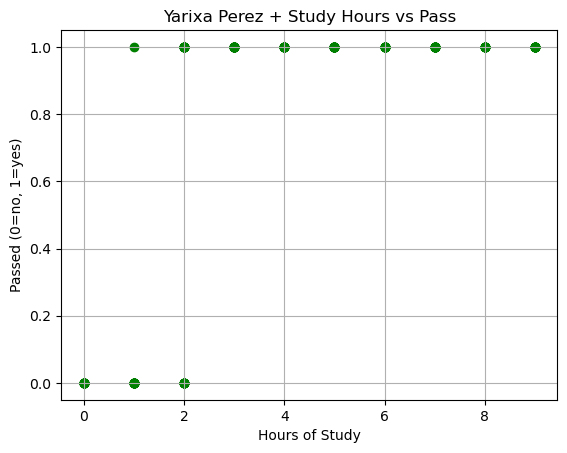

In [63]:
import matplotlib.pyplot as plt

# Visualize the data

# You need to use scatter chart to Visualize the input dataset X & y
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

# Your code: 
plt.scatter(X, y, color='green', label='Actual Data')
plt.xlabel("Hours of Study")
plt.ylabel("Passed (0=no, 1=yes)")
plt.title("Yarixa Perez + Study Hours vs Pass")
plt.grid()
plt.show()

#### **Section 3: Implementing Logistic Regression**

*Objective:* Implement logistic regression.

For **Undergraduate students** (CS457): You can **choose** any of the following methods to implement it.
1. You can use any scikit-learn library.
2. Manually write cost function & gradient descent function to implement it. 

For **Graduate students** (CS557): You have to implement it by
1. Manually write cost function & gradient descent function to implement it.


Then, use the scipy.optimize library to fit the logistic regression model.

In [ ]:
# Your code for logistic regression model

# Sklearn model
import 

# Prepare data

# Building the Model

# Review Model parameter 

In [ ]:
# Your logistic regression model

# Define the sigmoid function
def sigmoid(z):
    # pass
    return 1 / (1 + np.exp(-z))
     

# Define the cost function for logistic regression
def cost_function(theta, X, y):
        # pass
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost
   

# Define the gradient function
def gradient(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    grad = (1 / m) * np.dot(X.T, (h - y))
    return grad

In [80]:
from scipy.optimize import minimize
    
# Add a bias term (intercept) to X
X = np.column_stack((np.ones(len(X)), X))
    
# Initialize theta (parameters) to zeros
theta_init = np.zeros(X.shape[1])

# Define the sigmoid function
def sigmoid(z):
    # pass
    return 1 / (1 + np.exp(-z))
     

# Define the cost function for logistic regression
def cost_function(theta, X, y):
    # pass
    m = len(y)
    s = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(s) + (1 - y) * np.log(1 - s))
    return cost
   

# Define the gradient function
def gradient(theta, X, y):
    m = len(y)
    s = sigmoid(np.dot(X, theta))
    grad = (1 / m) * np.dot(X.T, (s - y))
    return grad.ravel()

# Minimize the cost function using scipy.optimize
result = minimize(fun=cost_function, x0=theta_init, args=(X, y), method='TNC', jac=gradient)
optimal_theta = result.x

# Print the optimized parameters (theta)
print("Optimized theta (parameters):", optimal_theta)

ValueError: tnc: gradient must have shape (len(x0),)

#### **Section 4: Evaluate the model**

*Objective:* Evaluate the model with the fitted data.

Task: build the Predict function, and Calculate accuracy.

In [ ]:
# Predict function
def predict(X, theta):
    # your code
    p = sigmoid(np.dot(X, theta))
    return (p >= 0.5).astype(int)
    
# Make predictions
predictions = predict(X, optimal_theta)

In [ ]:
# Calculate accuracy
accuracy = np.mean(predictions == y) * 100
print("Accuracy:", accuracy, "%")

### **Section 5: Visualizing Logistic Regression Fit**

*Objective:* Plot the logistic regression fit with the original data.

Task: Plot the sigmoid curve over the range of input features.

In [ ]:
# Plot the data and regression line
# You need to use scatter chart to Visualize the input dataset X & y
# Your chart should plot the regression line using theta_optimal predictions 
# Your chart need to label the x-axis, y-axis and title
# Your chart should use grid
# Please add your name to the graph title

plt.scatter(X, y, color='green', label='Actual Data')
plt.xlabel("Hours of Study")
plt.ylabel("Passed (0=no, 1=yes)")
plt.title("Yarixa Perez + Study Hours vs Pass")
plt.grid()
plt.show()